___
# PROJETO 1

## <font color='red'>Guilherme de Moraes Schoueri</font>
___

## <font color='blue'>Por que existem Aposentados que trabalham?</font>

## Introdução

A aposentadoria foi criada para compensar a diminuição do rendimento de uma pessoa que se tornou fisicamente incapaz de trabalhar por causa da idade. Mas, por alguma razão, alguns aposentados continuam a trabalhar, e eu queria saber por que.

Exemplifique identificando uma pesquisa semelhante feita no Brasil ou no exterior que compare uma parcela da população (apossentados, imigrantes, mulheres, jovens) com todo resto. Critique esta pesquisa (que tipo de variáveis usou? Que recurso de estatística descritiva?). Pode ser um artigo de jornal.

A Carta Capital publicou a notícia "Aumento de idade para aposentadoria é rejeitado por 82%" que tem base na pesquisa da Vox Populi feita no começo de agosto de 2016. A pesquisa expõe a opinião dos brasileiros sobre a ideia do aumento da idade para se aposentar pelo fato da expectativa de vida da população ter aumentado, mas a grande maioria dos intrevistados não gostou da ideia e justificou a opinião com a preocupação de perder benefícios. 

Apesar do pequeno número de intrevistados (1,5 mil), a pesquisa mostra que, mesmo com a capacidade de trabalhar, a pessoas não querem abrir mão do benefício de se aposentar cedo. Esse fato contribui para a hipótese de que a aposentadoria não tem mais o objetivo de ajudar quem não consegue trabalhar, e sim de cumprir o dever com a sociedade.

___
## Análise e Resultados

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Guilherme Moraes\Desktop\CDEng-master\Projeto1


In [4]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [5]:
pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

pnad2014.columns = estrutura.Coluna
pnad2014.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [6]:
pnad2014.V9001 = pnad2014.V9001.astype("category")
#pnad2014.V1252 = pnad2014.V1252.astype("category")
#pnad2014.V8005 = pnad2014.V8005.astype("category")
pnad2014.V4706 = pnad2014.V4706.astype("category")
#pnad2014.UF = pnad2014.UF.astype("category")
#pnad2014.V4719 = pnad2014.V4719.astype("category")
pnad2014.V0302 = pnad2014.V0302.astype("category")
pnad2014.V4803 = pnad2014.V4803.astype("category")
#pnad2014.V4720 = pnad2014.V4720.astype("category")
pnad2014.V9122 = pnad2014.V9122.astype("category")

In [7]:
trabalha = pnad2014.V9001
valorApos = pnad2014.V1252[(pnad2014.V1252 <= 2000)]
idade = pnad2014.V8005
prof = pnad2014.V4706
uf = pnad2014.UF
rendTrab = pnad2014.V4719[(pnad2014.V4719 <= 20000)]
sexo = pnad2014.V0302
anosEstudo = pnad2014.V4803
rendTotal = pnad2014.V4720[(pnad2014.V4720 <= 20000)]
aposentados = pnad2014.V9122

In [8]:

#QUALITATIVAS
trabalha.cat.categories = ('Trabalha','Não trabalha')
prof.cat.categories = ('Empregado com carteira de trabalho assinada', 'Militar','Funcionário público estatutário','Outro empregado sem carteira de trabalho assinada','Trabalhador doméstico com carteira de trabalho assinada','Trabalhador doméstico sem carteira  de trabalho assinada','Conta própria','Empregador','Trabalhador na produção para o próprio consumo','Trabalhador na construção para o próprio uso','Não remunerado')
sexo.cat.categories = ('Masculino','Feminino')
anosEstudo.cat.categories = ('Sem instrução e menos de 1 ano','1 ano','2 anos','3 anos','4 anos','5 anos','6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais','Não determinados ')
aposentados.cat.categories = ('Aposentado','Não aposentado')

#QUANTITATIVAS
pnad2014['faixaValorApos'] = valorApos
pnad2014['faixaIdade'] = idade
pnad2014['regioes'] = uf
pnad2014['faixaRendTrab'] = rendTrab
pnad2014['faixaRendTotal'] = rendTotal

faixaValorApos = pnad2014.faixaValorApos
faixaIdade = pnad2014.faixaIdade
regioes = pnad2014.regioes
faixaRendTrab = pnad2014.faixaRendTrab
faixaRendTotal = pnad2014.faixaRendTotal
cutIdade = pd.cut(idade, bins = 40)

def f_idade (x):
    if x >= 65:
        return "Idoso"
    elif x >= 30:
        return "Adulto"
    elif x >= 18:
        return "Jovem Adulto"
    else:
        return "Menor"
    
def f_uf (x):
    if x >= 50:
        return "Centro-oeste"
    elif x >= 41:
        return "Sul"
    elif x >= 31:
        return "Sudeste"
    elif x >= 21:
        return "Nordeste"
    else:
        return "Norte"
    
faixaIdade = faixaIdade.map(f_idade)
regioes = regioes.map(f_uf)

faixaValorApos = pd.cut(faixaValorApos, bins=50)
faixaRendTrab = pd.cut(faixaRendTrab, bins=50)


tra = aposentados[(trabalha == "Trabalha")]
ntra = aposentados[(trabalha != "Trabalha")]

trabApos = trabalha[(aposentados == "Aposentado")]
trabApos.cat.categories = ('Aposentado e trabalha','Aposentado e não trabalha')

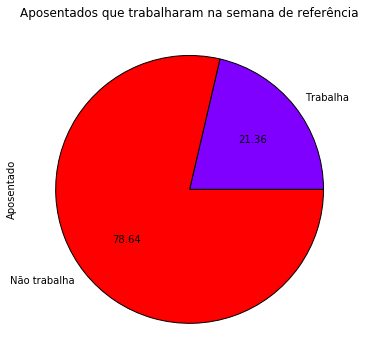

In [9]:
ct = pd.crosstab(trabalha, aposentados)

ct.Aposentado.plot.pie(title="Aposentados que trabalharam na semana de referência", figsize=(6, 6), colormap="rainbow", autopct="%0.2f")

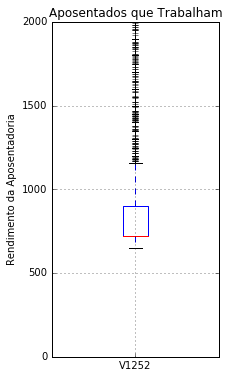

In [108]:
ct1 = pd.crosstab(valorApos, trabApos)
valorApos[(trabApos == 'Aposentado e trabalha')].plot.box(title="Aposentados que Trabalham", grid=True, figsize=(3, 6))
axes = plt.gca()
axes.set_ylim(0,2000)
plt.ylabel('Rendimento da Aposentadoria')


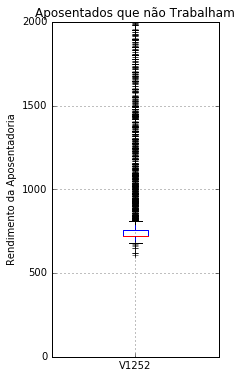

In [107]:
valorApos[(trabApos == 'Aposentado e não trabalha')].plot.box(title="Aposentados que não Trabalham", grid=True, figsize=(3, 6))
axes = plt.gca()
axes.set_ylim(0,2000)
plt.ylabel('Rendimento da Aposentadoria')


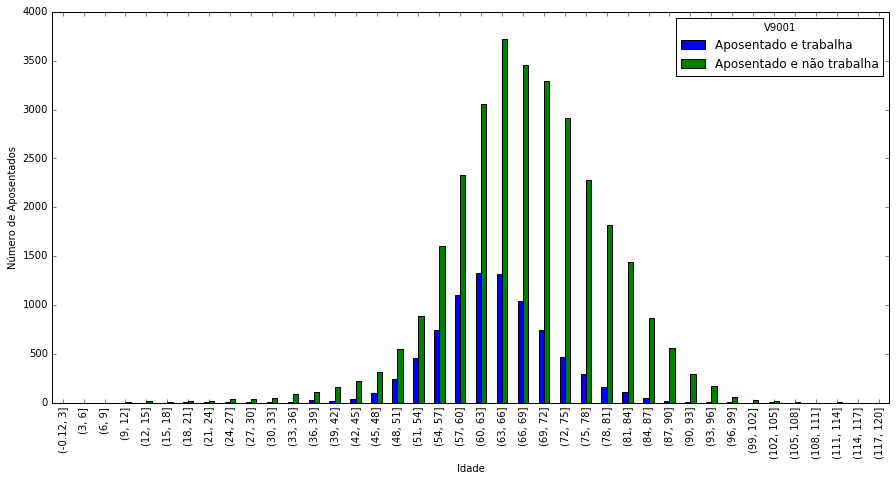

In [106]:
ct2 = pd.crosstab(trabApos,cutIdade)
ct2.T.plot.bar(figsize=(15,7))
plt.ylabel('Número de Aposentados')
plt.xlabel('Idade')

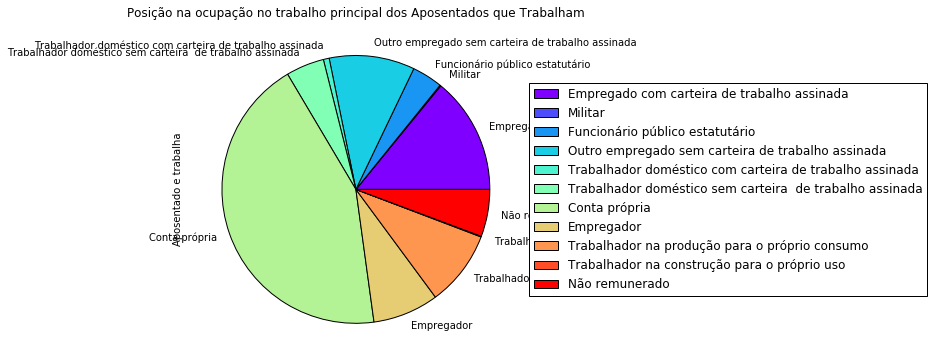

In [95]:
pa = pd.crosstab(prof, trabalha)
ct3 = pd.crosstab(prof, trabApos)
ct3.iloc[:,0].plot.pie(title="Posição na ocupação no trabalho principal dos Aposentados que Trabalham", figsize=(6, 6), colormap="rainbow", legend="False").legend(loc='center left', bbox_to_anchor=(1, 0.5))



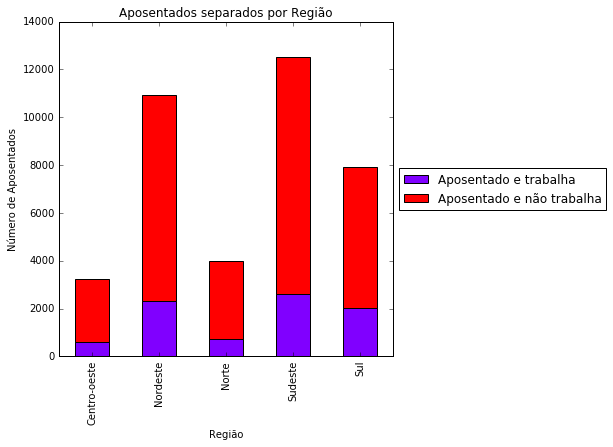

In [105]:
ct4 = pd.crosstab(regioes, trabApos)
ct4.plot.bar(title="Aposentados separados por Região", figsize=(6, 6), colormap="rainbow", stacked="True").legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Número de Aposentados')
plt.xlabel('Região')

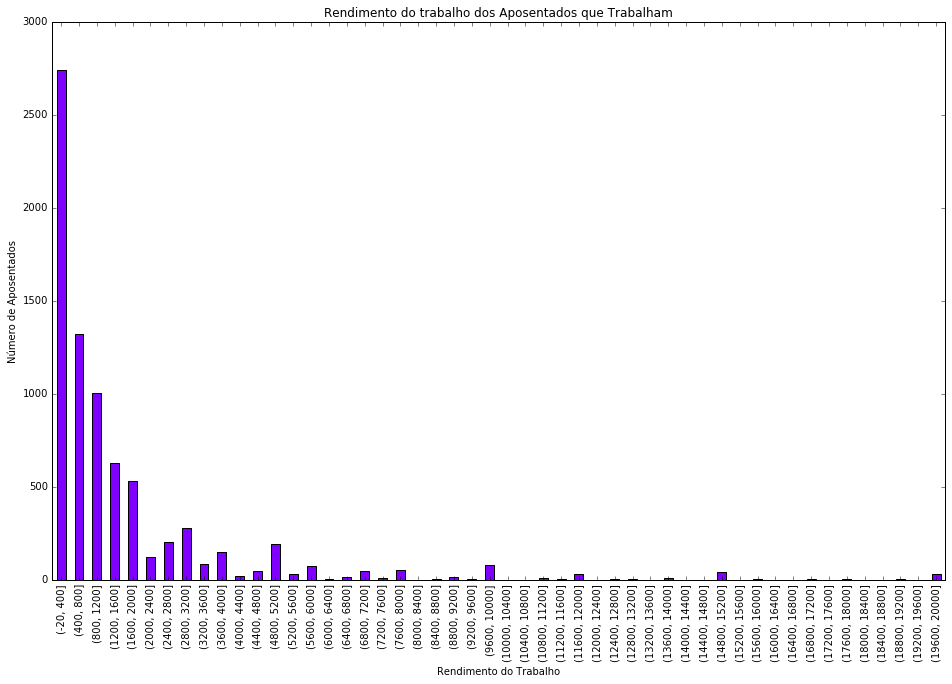

In [104]:
ct5 = pd.crosstab(faixaRendTrab, trabApos)
ct5.iloc[:,0].plot.bar(title="Rendimento do trabalho dos Aposentados que Trabalham", figsize=(16, 10), colormap="rainbow")
plt.ylabel('Número de Aposentados')
plt.xlabel('Rendimento do Trabalho')

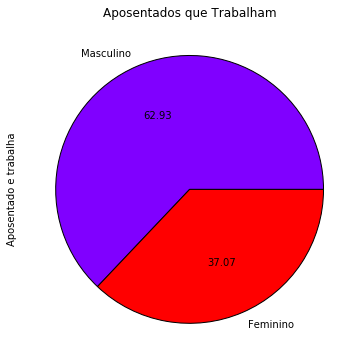

In [91]:
ct6 = pd.crosstab(sexo, trabApos)
ct6.iloc[:,0].plot.pie(title="Aposentados que Trabalham", figsize=(6, 6), colormap="rainbow", autopct="%0.2f")

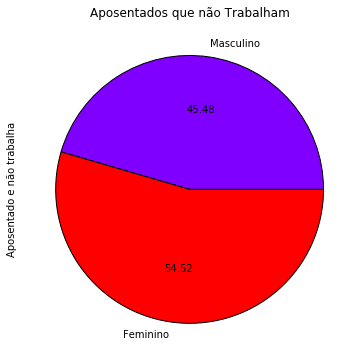

In [92]:
ct7 = pd.crosstab(sexo, trabApos)
ct7.iloc[:,1].plot.pie(title="Aposentados que não Trabalham", figsize=(6, 6), colormap="rainbow", autopct="%0.2f")

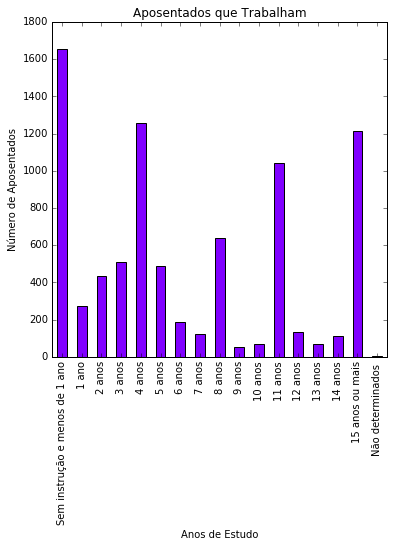

In [103]:
ct8 = pd.crosstab(anosEstudo, trabApos)
ct8.iloc[:,0].plot.bar(title="Aposentados que Trabalham", figsize=(6, 6), colormap="rainbow")
plt.ylabel('Número de Aposentados')
plt.xlabel('Anos de Estudo')

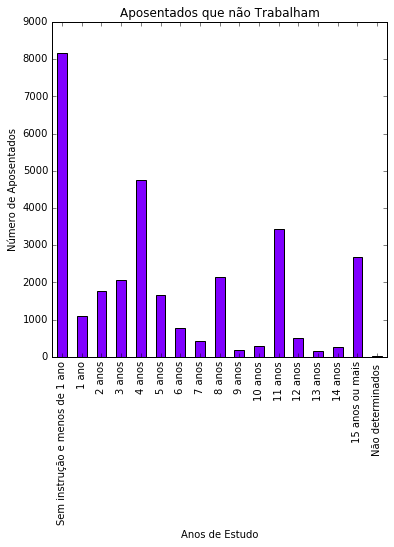

In [102]:
ct9 = pd.crosstab(anosEstudo, trabApos)
ct9.iloc[:,1].plot.bar(title="Aposentados que não Trabalham", figsize=(6, 6), colormap="rainbow")
plt.ylabel('Número de Aposentados')
plt.xlabel('Anos de Estudo')

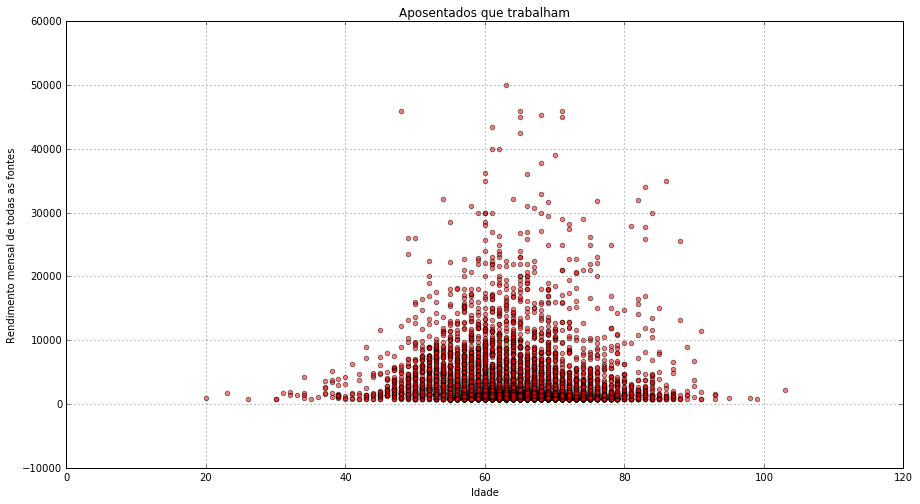

In [87]:
din = 50000

fig = plt.figure(figsize=(15,8))
plt.grid(True)
traba = plt.scatter(x=pnad2014.V8005[(pnad2014.V4720<=din)][(pnad2014.V9122 == 2)][(pnad2014.V9001 == 1)],y=pnad2014.V4720[(pnad2014.V4720<=din)][(pnad2014.V9122 == 2)][(pnad2014.V9001 == 1)],c="r",marker="o",alpha=0.5)

#plt.legend((traba, ntraba),('Trabalham', 'Não Trabalham'),scatterpoints=1,loc='lower left',ncol=3,fontsize=12)
plt.ylabel('Rendimento mensal de todas as fontes')
plt.xlabel('Idade')
plt.title("Aposentados que trabalham")
plt.show()


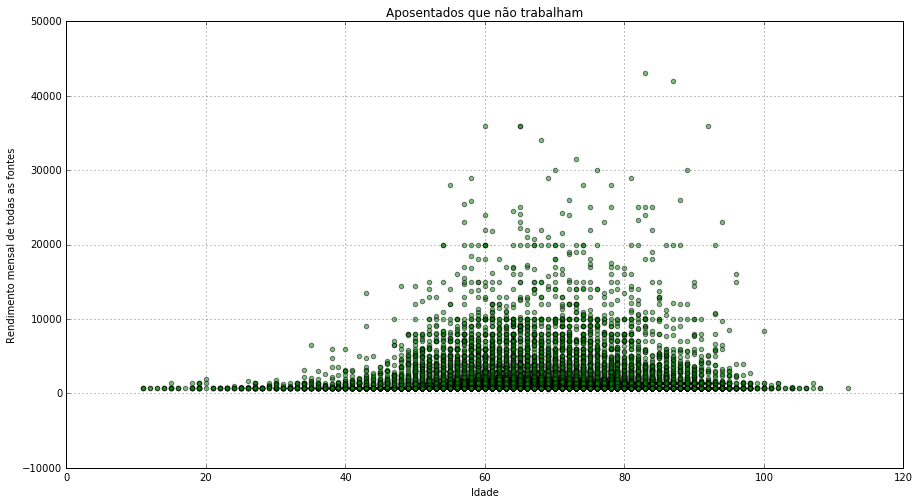

In [88]:
fig = plt.figure(figsize=(15,8))
plt.grid(True)
ntraba = plt.scatter(x=pnad2014.V8005[(pnad2014.V4720<=din)][(pnad2014.V9122 == 2)][(pnad2014.V9001 == 3)],y=pnad2014.V4720[(pnad2014.V4720<=din)][(pnad2014.V9122 == 2)][(pnad2014.V9001 == 3)],c="g",alpha=0.5)
#plt.legend((traba, ntraba),('Trabalham', 'Não Trabalham'),scatterpoints=1,loc='lower left',ncol=3,fontsize=12)
plt.ylabel('Rendimento mensal de todas as fontes')
plt.xlabel('Idade')
plt.title("Aposentados que não trabalham")
plt.show()

___
## Conclusão 

Após analisar todos os gráficos, podemos concluir que mesmo recebendo aposentadoria uma pequena parte dos aposentados continua trabalhando, e com uma análise mais profunda é possível notar que essa pequena parte tem como maioria os aposentados mais jovens e que trabalham por conta própria. Além disso, o valor recebido da aposentadoria dos que trabalham tende a ser menor do que o daqueles que não trabalham.